In [11]:
import numpy as np, matplotlib.pyplot as plt, math
from mpl_toolkits import mplot3d
from random import randint
import random
%matplotlib notebook

In [12]:
def magnetic_force(charge,velocity,field): return charge*np.cross(velocity,field)

class particle:
    
    def __init__(self, r, v, q, m):
        self.r, self.v, self.q, self.m = np.asarray(r), np.asarray(v), q, m
        self.history = {'x':[], 'y':[], 'z':[]}
    
    def update(self, field, time_step):
        F =  magnetic_force(self.q, self.v, np.asarray(field))
        self.r = self.r + self.v * np.float64(time_step)
        self.v = self.v + F * np.float64(time_step) / self.m
        self.history['x'].append(self.r[0]), self.history['y'].append(self.r[1])
        self.history['z'].append(self.r[2])
        
    def iterate(self, external_field, elapsed_time, time_step):
        for i in range(elapsed_time): self.update(external_field, time_step)

    ### WARNING: ELAPSED_TIME MUST BE AN INTEGER. 
    ### We should be able to fix this easily with arange().
            
    def plot_trajectory(self):
        ax.plot3D(electron.history['x'], electron.history['y'], \
                  electron.history['z'], 'b-');
class random_particle:
    
    def __init__(self):
        self.r = np.asarray([0.5 - (1.0 * np.random.ranf()),0.5 - \
                            (1.0 * np.random.ranf()),0.5 - (1.0 * np.random.ranf())])
        self.v = np.asarray([1.0 - (2.0 * np.random.ranf()),1.0 - \
                            (2.0 * np.random.ranf()),1.0 - (2.0 * np.random.ranf())])
        self.q = 1 - (2 * np.random.ranf())
        self.m = 0.05 + np.random.ranf()
        self.history = {'x':[], 'y':[], 'z':[]}
        
    def update(self, field, time_step):
        F =  magnetic_force(self.q, self.v, np.asarray(field))
        self.r = self.r + self.v * np.float64(time_step)
        self.v = self.v + F * np.float64(time_step) / self.m
        self.history['x'].append(self.r[0]), self.history['y'].append(self.r[1])
        self.history['z'].append(self.r[2])
        
    def iterate(self, external_field, elapsed_time, time_step):
        for i in range(elapsed_time): self.update(external_field, time_step)

In [13]:
##################  USER PARAMETERS ###########################

external_field = [np.float64(0),np.float64(0),np.float64(5.0)]
time_step = 0.001
elapsed_time = 1000
number_of_particles = 10

###############################################################

In [14]:
randoms = []
# Populate an array with random_particles, iterate over the elapsed time.
for i in range(number_of_particles): randoms.append(random_particle())
for i in range(number_of_particles): randoms[i].iterate(external_field,elapsed_time,time_step)

<IPython.core.display.Javascript object>


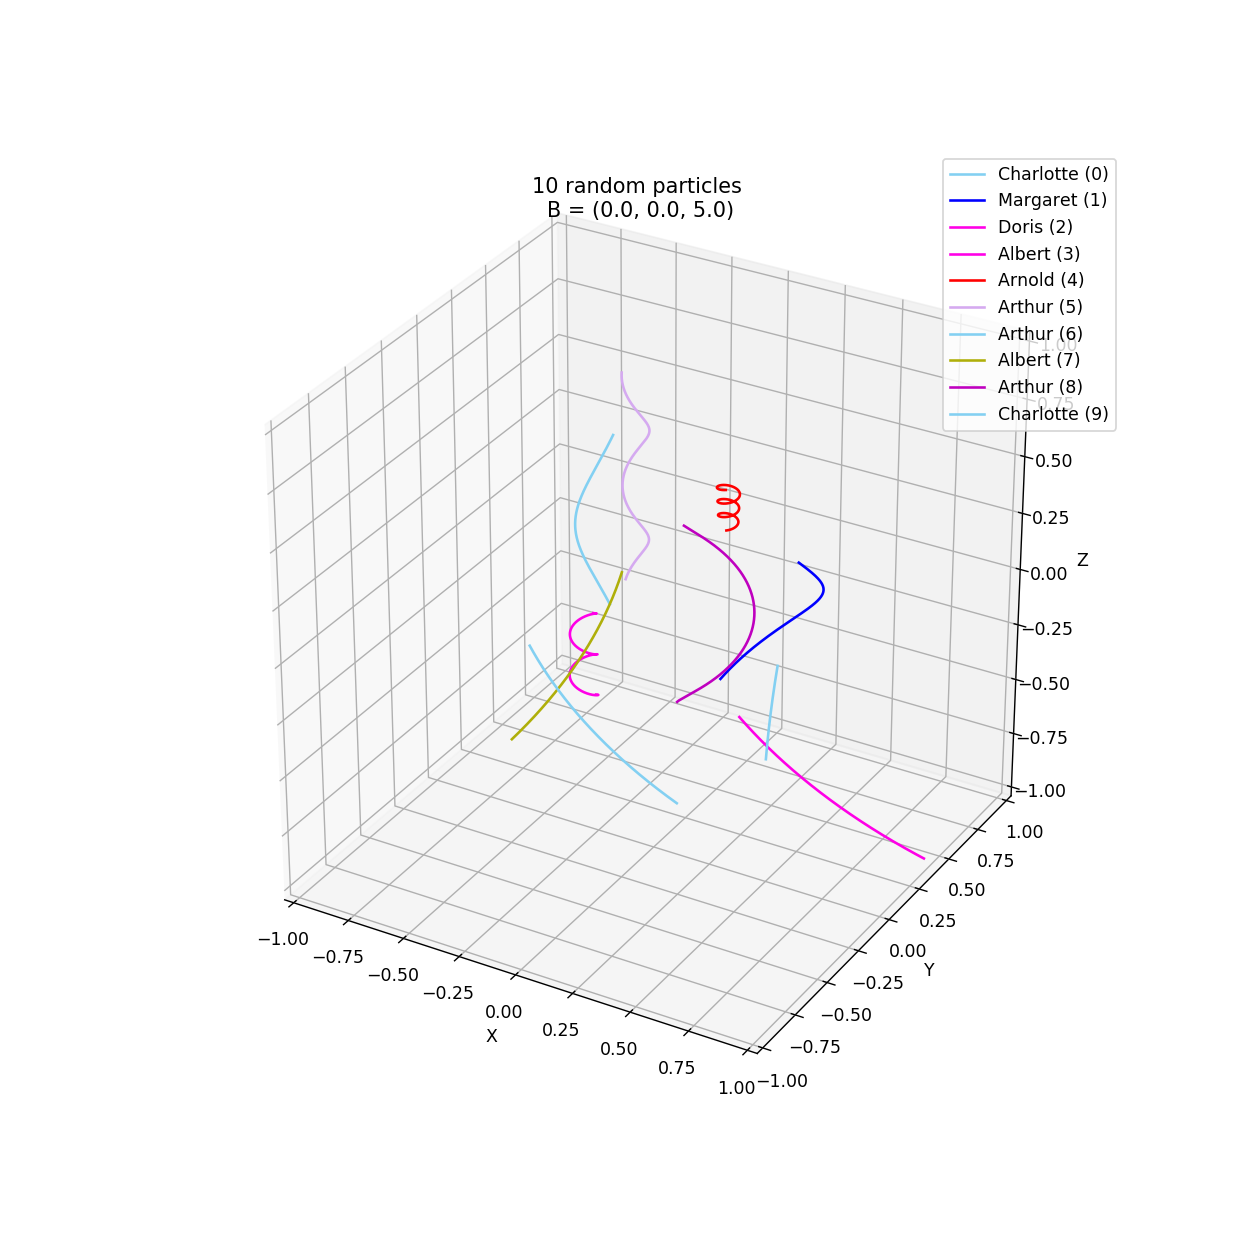

Charlotte v_0 = [0.28316263 0.29195426 0.85785131] q = -0.341 m = 0.480 

Margaret v_0 = [-0.48011269 -0.64744165 -0.7995508 ] q = -0.588 m = 1.024 

Doris v_0 = [ 0.87146104  0.10821617 -0.29720897] q = -0.030 m = 0.282 

Albert v_0 = [-0.69298891  0.34909332 -0.40401661] q = -0.694 m = 0.250 

Arnold v_0 = [0.80305236 0.22195696 0.17701098] q = -0.633 m = 0.168 

Arthur v_0 = [-0.25479283  0.5838557   0.91074899] q = 0.937 m = 0.388 

Arthur v_0 = [-0.17706525  0.27277064 -0.62544103] q = 0.020 m = 1.019 

Albert v_0 = [-0.09399533  0.61319808  0.49566445] q = -0.083 m = 0.516 

Arthur v_0 = [-0.56942992  0.56866297 -0.70473006] q = 0.208 m = 0.192 

Charlotte v_0 = [-0.74057725  0.53418995  0.28206518] q = 0.042 m = 0.407 



In [15]:
colors = ['#b87f86', '#ff8d00', '#cbffe8','#ff00e7',\
         '#afaf0a', '#003366', '#83d0f2',\
         '#d5aaf0', '#f3b7c3','r','b','g','k','m']

names = ['Cornelius', 'Mortimer', 'William', 'Albert', 'Freddie',
        'Bernard', 'Martha', 'Chester', 'Clarence', 'Arthur',
        'Ernest', 'Elizabeth', 'Arnold', 'Doris', 'Charles',
        'Charlotte', 'Alice', 'Gertrude', 'Margaret', 'Dorothy',
        'Wallace', 'Eugene', 'Waldo', 'Alfred', 'Bertha', 'Eleanor']

chosen_colors, chosen_names = [],[]
for i in range(number_of_particles): 
    chosen_colors.append(random.choice(colors))
    chosen_names.append(random.choice(names))

fig = plt.figure(figsize=(10,10));
ax = plt.axes(projection='3d');
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
for i in range(number_of_particles): 
    ax.plot3D(randoms[i].history['x'], randoms[i].history['y'], \
    randoms[i].history['z'], color = chosen_colors[i], \
    label = chosen_names[i] + " (" + str(i) + ")")
plt.title("%i random particles \n" % number_of_particles + \
          'B = (%.1f' % external_field[0] + ', %.1f, ' % external_field[1] \
          + '%.1f)' % external_field[2])
ax.legend();
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');
for i in range(number_of_particles):
    print(chosen_names[i],'v_0 =', randoms[i].v, \
         "q = %.3f" % randoms[i].q, "m = %.3f" % randoms[i].m, '\n')